In [ ]:
import pandas as pd
import numpy as np

#Exporting data
from google.colab import files

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

#Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [ ]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print('Sepal Length Median', data.SepalLengthCm.median())
print('Sepal Width Median', data.SepalWidthCm.median())
print('Petal Length Median', data.PetalLengthCm.median())
print('Petal Width Median', data.PetalWidthCm.median())

Sepal Length Median 5.8
Sepal Width Median 3.0
Petal Length Median 4.35
Petal Width Median 1.3


In [ ]:
#Creating bins with median

Sepallength_new = pd.cut(data.SepalLengthCm,bins= [-np.inf,data.SepalLengthCm.median(),np.inf],labels = ["Lesser than 5.8 cm","More than 5.8 cm"])
Sepalwidth_new = pd.cut(data.SepalWidthCm,bins= [-np.inf,data.SepalWidthCm.median(),np.inf],labels = ["Lesser than 3.0 cm","More than 3.0 cm"])
Petallength_new = pd.cut(data.PetalLengthCm,bins= [-np.inf,data.PetalLengthCm.median(),np.inf],labels = ["Lesser than 4.35 cm","More than 4.35 cm"])
Petalwidth_new = pd.cut(data.PetalWidthCm,bins= [-np.inf,data.PetalWidthCm.median(),np.inf],labels = ["Lesser than 1.3 cm","More than 1.3 cm"])

In [ ]:
#Creating a dataframe of binned columns
data_bins=pd.concat([Sepallength_new,Sepalwidth_new,Petallength_new,Petalwidth_new,data.Species],axis=1)

In [ ]:
#Exporting data to excel file
data_bins.to_excel('Iris_binned_file.xlsx',index=False)

In [ ]:
#Downloading updated file.
files.download("Iris_binned_file.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_bins['SepalLengthCm']=data_bins['SepalLengthCm'].map({'Lesser than 5.8 cm':0,'More than 5.8 cm':1})
data_bins['SepalWidthCm']=data_bins['SepalWidthCm'].map({'Lesser than 3.0 cm':0,'More than 3.0 cm':1})
data_bins['PetalLengthCm']=data_bins['PetalLengthCm'].map({'Lesser than 4.35 cm':0,'More than 4.35 cm':1})
data_bins['PetalWidthCm']=data_bins['PetalWidthCm'].map({'Lesser than 1.3 cm':0,'More than 1.3 cm':1})

# **Decision Tree**

In [ ]:
x=data_bins.drop(['Species'],axis=1)
y=data_bins.Species

In [ ]:
decision_tree=tree.DecisionTreeClassifier(criterion='entropy').fit(x,y)

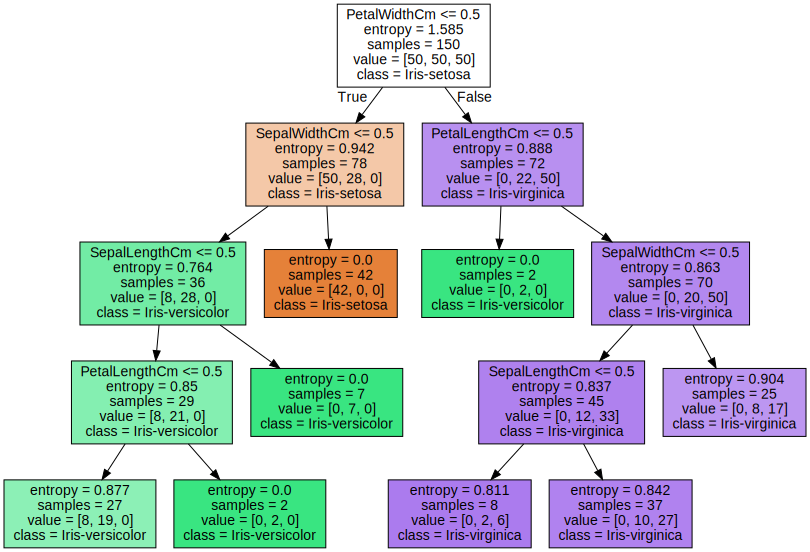

In [ ]:
#Visualizing the decision tree
graphviz.Source(tree.export_graphviz(decision_tree,feature_names=data.columns[:-1][1:], class_names = data.Species.unique(), filled = True))

# **Feature Selection**

In [ ]:
data_x = pd.DataFrame(data, columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm", "PetalWidthCm"])
data_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data_y = pd.DataFrame(data, columns=["Species"])
data_y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
data_y["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
x_data=data_x.iloc[:,:]
y_data=data_y.iloc[:,0]
y_data

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
KBestmodel = SelectKBest(chi2, k = 2).fit(data_x,data_y)

In [ ]:
x_new = KBestmodel.transform(data_x)

In [ ]:
cols = KBestmodel.get_support(indices= True)
cols

array([2, 3])

In [ ]:
features = data_x.iloc[:, cols]
features

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
